# Synthetic Minority Oversampling Technique (SMOTE)

Class imbalance in datasets is a critical challenge, often encountered in various real-world applications such as fraud detection, medical diagnosis, and anomaly detection. Synthetic Minority OverSampling Technique (SMOTE) is a popular tool for mitigating this issue. SMOTE is a data augmentation method that strategically generates synthetic examples for the minority class, thereby rebalancing imbalanced datasets. By intelligently synthesizing new data points that are consistent with the characteristics of the minority class, SMOTE helps improve the overall performance of machine learning models, making them more robust and accurate in scenarios where minority class samples are sparse.

From blog post https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688 
([notebook](https://www.kaggle.com/code/saptarsi/smote-notebook/notebook))





## Class Imbalance

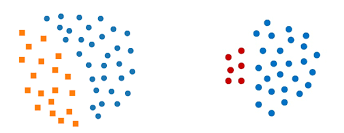

* Often the distribution of the classes are skewed
* For a binary classification, we typically call the one class occuring more as the majority class and the other as the minority or rare class.  Example: Fraud Detection
* The classifier ends up being dominated by the majority class
* The baseline methods are oversampling the minority class or undersampling the majority class

## How SMOTE works

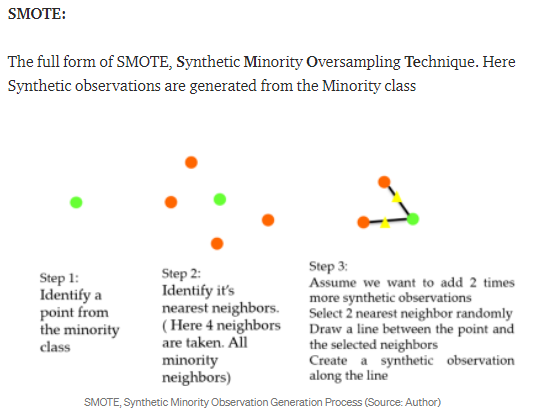

## Setup

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

## Creating a sample dataset

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

## Visualize the data

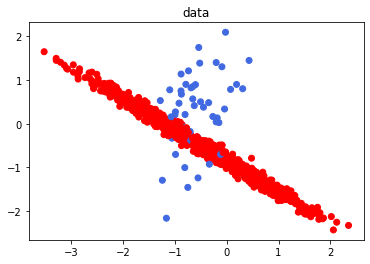

In [3]:
plt.gca().set_title('data')
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

## Regular housekeeping splitting in train,test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
np.bincount(y_train)

array([ 31, 669])

## Fitting a logistic classifier

In [5]:
from sklearn.linear_model import LogisticRegression
#Initalize the classifier
clf = LogisticRegression(random_state=0)
#Fitting the training data
clf.fit(X_train, y_train)
#Predicting on test
y_pred=clf.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  4  15]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.95      1.00      0.97       281

    accuracy                           0.95       300
   macro avg       0.97      0.61      0.66       300
weighted avg       0.95      0.95      0.93       300



In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [8]:
np.bincount(y_res)

array([669, 669])

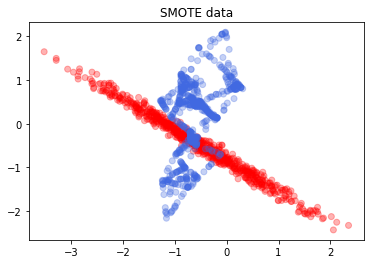

In [9]:
plt.gca().set_title('SMOTE data')
plt.scatter(X_res[:,0], X_res[:,1],c=vectorizer(y_res), alpha=0.3)
plt.show()

In [12]:
from sklearn.metrics import classification_report
clf1 = LogisticRegression(random_state=0)
#Fitting the training data
clf1.fit(X_res, y_res)
#Predicting on test
y_pred1=clf1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[ 16   3]
 [ 40 241]]
              precision    recall  f1-score   support

           0       0.29      0.84      0.43        19
           1       0.99      0.86      0.92       281

    accuracy                           0.86       300
   macro avg       0.64      0.85      0.67       300
weighted avg       0.94      0.86      0.89       300



### Sampling_strategy
* float sampling_strategy='auto', an indicator how much majority/minority mix will be created, applicable for binary classification
*  specify the class targeted by the resampling

### k_neighbors
* number of nearest neighbours to used to construct synthetic samples



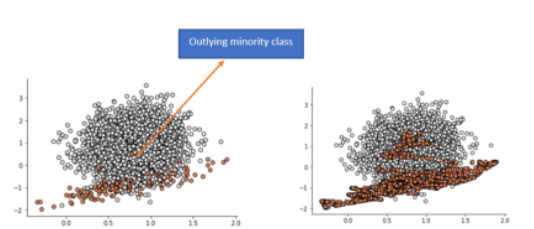

## Some other strategies are 
* ADASYN
* BorderLine SMOTE
* KMeansSMOTE